In [1]:
#Importing libraries and dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

rng = np.random.RandomState(42)
import pickle
#All the features
import os
path = 'C:\Prashant\Teradata\Analytics\IOT\Waseem'
os.chdir(path)



In [2]:
import pandas as pd
oddata1 = pd.read_csv('oddata1.csv')
list(oddata1)
print(oddata1.head(5))

         f1        f2        f3        f4        f5        f6        f7  \
0  0.121020  0.115043  0.018801  0.009065  0.006449  0.020476  0.058333   
1  0.140722  0.218772  0.040333  0.055266  0.040063  0.028287  0.102752   
2  0.081126  0.065491  0.029324  0.004907  0.012861  0.031133  0.064110   
3  0.265287  0.066680  0.036866  0.023651  0.039152  0.076241  0.052662   
4  0.138840  0.166306  0.035365  0.019242  0.022293  0.069795  0.168669   

         f8        f9  
0  0.101004  0.020407  
1  0.117139  0.036908  
2  0.066042  0.004089  
3  0.055541  0.038112  
4  0.081515  0.037448  


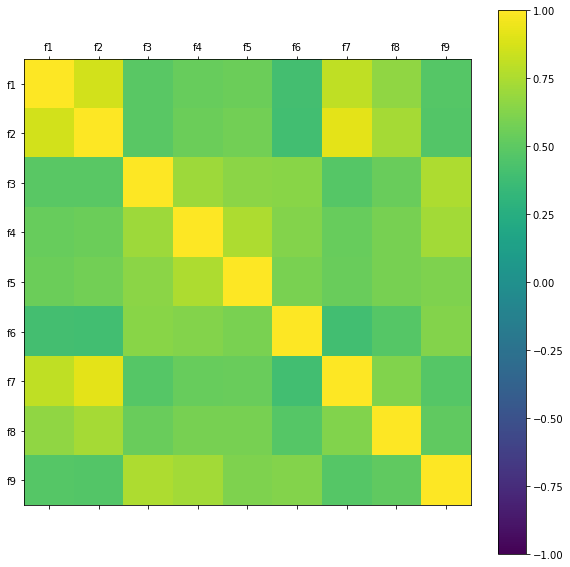

In [40]:
names = ['f1','f2','f3','f4','f5','f6','f7','f8','f9']
correlations = oddata1.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

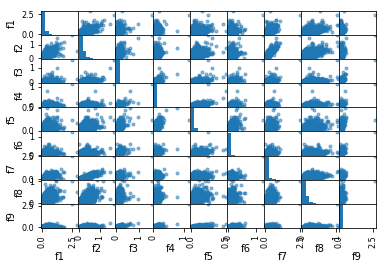

In [37]:
from pandas.tools.plotting import scatter_matrix
#fig = plt.figure(figsize=(50,50))
#fig.add_subplot(111)
scatter_matrix(oddata1)
plt.show()

In [4]:
# model each columns seperately
namespace = globals()
   
def modelthiscol(i,thresold):
   
    namespace['trainf%s' % i] = train[[eval("'f'+str(i)")]]
    #One class svm for f1
    clf = OneClassSVM(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, nu=thresold, random_state=rng)
    clf.fit(namespace['trainf%s' % i])
    
    namespace['y_pred_testf%s' % i] = clf.predict(test[[eval("'f'+str(i)")]])
    
    return namespace['y_pred_testf%s' % i]


#Function for plotting all variable against self to identify outliers, it takes model output as input
#Input parameters - Name of Trained Model

def plotselfall(modelcol,modelname):

    fig = plt.figure(figsize=(20,20))
    plt.title('Model name - %s \n'%(str(modelname)))
    
    ax1 = fig.add_subplot(4,4,1)
    ax1.imshow(plt.imread(plotprediction(modelcol, 'f1', 'f1')))

    ax2 = fig.add_subplot(4,4,2)
    ax2.imshow(plt.imread(plotprediction(modelcol, 'f2', 'f2')))

    ax3 = fig.add_subplot(4,4,3)
    ax3.imshow(plt.imread(plotprediction(modelcol, 'f3', 'f3')))

    ax4 = fig.add_subplot(4,4,4)
    ax4.imshow(plt.imread(plotprediction(modelcol, 'f4', 'f4')))

    ax5 = fig.add_subplot(4,4,5)
    ax5.imshow(plt.imread(plotprediction(modelcol, 'f5', 'f5')))

    ax6 = fig.add_subplot(4,4,6)
    ax6.imshow(plt.imread(plotprediction(modelcol, 'f6', 'f6')))

    ax7 = fig.add_subplot(4,4,7)
    ax7.imshow(plt.imread(plotprediction(modelcol, 'f7', 'f7')))

    ax8 = fig.add_subplot(4,4,8)
    ax8.imshow(plt.imread(plotprediction(modelcol, 'f8', 'f8')))

    ax9 = fig.add_subplot(4,4,9)
    ax9.imshow(plt.imread(plotprediction(modelcol, 'f9', 'f9')))
    
    plt.show()

#Prediction Plot function, scatter plots. Takes modeloutput and 2 columns as inputs
def plotprediction(fcol,col1,col2):
    y_pred_test = fcol
    
    #seggregating anamolies from normal for analysis
    df = pd.DataFrame(y_pred_test)
    df = df.rename(columns={0: 'pred'})
    #print(df)
    
    
    df_c = pd.concat([test.reset_index(drop=True), df], axis=1)
    
    y1 = df_c[(df['pred'] == 1)]
    yminus1 = df_c[(df['pred'] == -1)]
    
    plt.title('Scatter plot %s vs %s'%(str(col2),str(col1)))
    
    b1 = plt.scatter(y1.eval(col1), y1.eval(col2), c='green')
    b2 = plt.scatter(yminus1.eval(col1), yminus1.eval(col2), c='red')
    
    plt.axis('tight')
    plt.xlim((0, 0.9))
    plt.ylim((0, 0.9))
    plt.legend([b1, b2],
               ["Normal observations",
                "Abnormal observations"],
               loc="upper left")
    plotname = 'Scatter_%svs%s'%(str(col1),str(col2))
    plt.savefig(str(plotname)+'.png')
    #plt.show()
    #print plotname
    #print("Ratio of posivtive for first column "+str(float(np.count_nonzero(y1.eval(col1)))/float(np.count_nonzero(y_pred_test))))
    #print("Ratio of posivtive for second column "+str(float(np.count_nonzero(y1.eval(col2)))/float(np.count_nonzero(y_pred_test))))
    return str(plotname)+'.png'

#Ploting one variable against all by taking model output and one variable as input
#Input parameters - Name of Trained Model, Column name to obeserve against all columns
def plotonevsall(modelcol,testcol,modelname):

    fig = plt.figure(figsize=(20,20))
    
    plt.title('Model name - %s \n'%(str(modelname)))
    
    ax1 = fig.add_subplot(4,4,1)
    ax1.imshow(plt.imread(plotprediction(modelcol, testcol, 'f1')))

    ax2 = fig.add_subplot(4,4,2)
    ax2.imshow(plt.imread(plotprediction(modelcol, testcol, 'f2')))

    ax3 = fig.add_subplot(4,4,3)
    ax3.imshow(plt.imread(plotprediction(modelcol, testcol, 'f3')))

    ax4 = fig.add_subplot(4,4,4)
    ax4.imshow(plt.imread(plotprediction(modelcol, testcol, 'f4')))

    ax5 = fig.add_subplot(4,4,5)
    ax5.imshow(plt.imread(plotprediction(modelcol, testcol, 'f5')))

    ax6 = fig.add_subplot(4,4,6)
    ax6.imshow(plt.imread(plotprediction(modelcol, testcol, 'f6')))

    ax7 = fig.add_subplot(4,4,7)
    ax7.imshow(plt.imread(plotprediction(modelcol, testcol, 'f7')))

    ax8 = fig.add_subplot(4,4,8)
    ax8.imshow(plt.imread(plotprediction(modelcol, testcol, 'f8')))

    ax9 = fig.add_subplot(4,4,9)
    ax9.imshow(plt.imread(plotprediction(modelcol, testcol, 'f9')))
    
    plt.show()


In [5]:
oddataarr = oddata1.loc[oddata1.f1>0.002,['f1','f2','f3','f4','f5','f6','f7','f8','f9']]
oddataarr.shape

#Divide the data into training and test set
msk = np.random.rand(len(oddataarr)) < 0.8

train = oddataarr[msk]

test = oddataarr[~msk]

#print test.head(5)
#print testlog.head(5)


In [6]:
#create log instances of variables

trainlog = np.log(train)
testlog = np.log(test)

trainsquare = np.square(train)
testsquare = np.square(test)

trainsquareroot = np.sqrt(train)
testsquareroot = np.sqrt(test)

trainexp = np.exp(train)
testexp = np.exp(test)

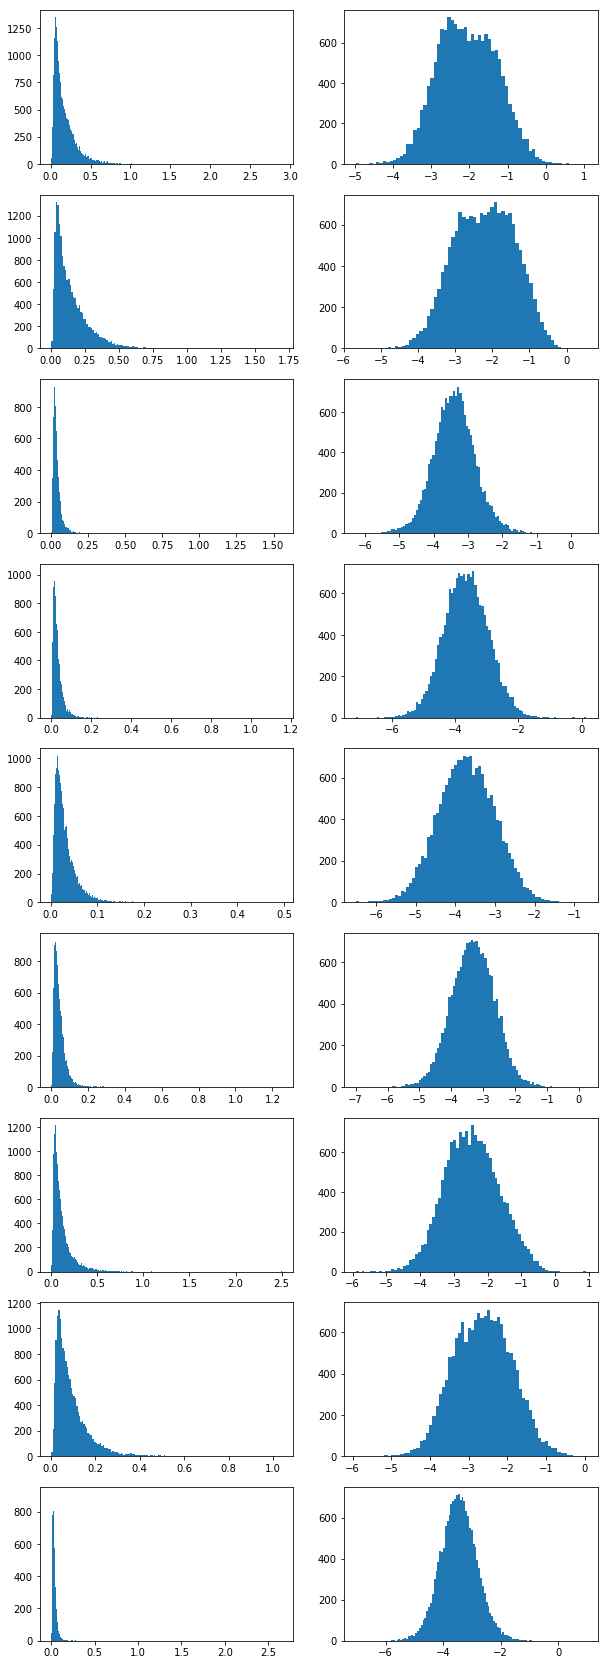

In [7]:


#Plotting and histogram of - normal and log variables

fig = plt.figure(figsize=(10,30))
    
ax1 = fig.add_subplot(9,2,1)
ax1.hist(train.f1, bins='auto')
#plt.title("Histogram with 'auto' bins")

ax1 = fig.add_subplot(9,2,2)
ax1.hist(trainlog.f1, bins='auto')

ax1 = fig.add_subplot(9,2,3)
ax1.hist(train.f2, bins='auto')

ax1 = fig.add_subplot(9,2,4)
ax1.hist(trainlog.f2, bins='auto')

ax1 = fig.add_subplot(9,2,5)
ax1.hist(train.f3, bins='auto')

ax1 = fig.add_subplot(9,2,6)
ax1.hist(trainlog.f3, bins='auto')

ax1 = fig.add_subplot(9,2,7)
ax1.hist(train.f4, bins='auto')

ax1 = fig.add_subplot(9,2,8)
ax1.hist(trainlog.f4, bins='auto')

ax1 = fig.add_subplot(9,2,9)
ax1.hist(train.f5, bins='auto')

ax1 = fig.add_subplot(9,2,10)
ax1.hist(trainlog.f5, bins='auto')

ax1 = fig.add_subplot(9,2,11)
ax1.hist(train.f6, bins='auto')

ax1 = fig.add_subplot(9,2,12)
ax1.hist(trainlog.f6, bins='auto')

ax1 = fig.add_subplot(9,2,13)
ax1.hist(train.f7, bins='auto')

ax1 = fig.add_subplot(9,2,14)
ax1.hist(trainlog.f7, bins='auto')

ax1 = fig.add_subplot(9,2,15)
ax1.hist(train.f8, bins='auto')

ax1 = fig.add_subplot(9,2,16)
ax1.hist(trainlog.f8, bins='auto')

ax1 = fig.add_subplot(9,2,17)
ax1.hist(train.f9, bins='auto')

ax1 = fig.add_subplot(9,2,18)
ax1.hist(trainlog.f9, bins='auto')

plt.show()

In [9]:
for i in range(1,10):
    namespace['fcol%s' % i] = modelthiscol(i,0.02)


In [11]:
# fit the model Isolation Forest
clf = IsolationForest(max_samples=10000, random_state=rng,contamination=0.02)
clf.fit(train)
#y_pred_train = clf.predict(train)
y_pred_test_IF_all = clf.predict(test)



In [12]:
#fit the model One class svm
clf = OneClassSVM(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, nu=0.02, random_state=rng)
clf.fit(train)
#y_pred_train = clf.predict(train)
y_pred_test_OSVM_all = clf.predict(test)

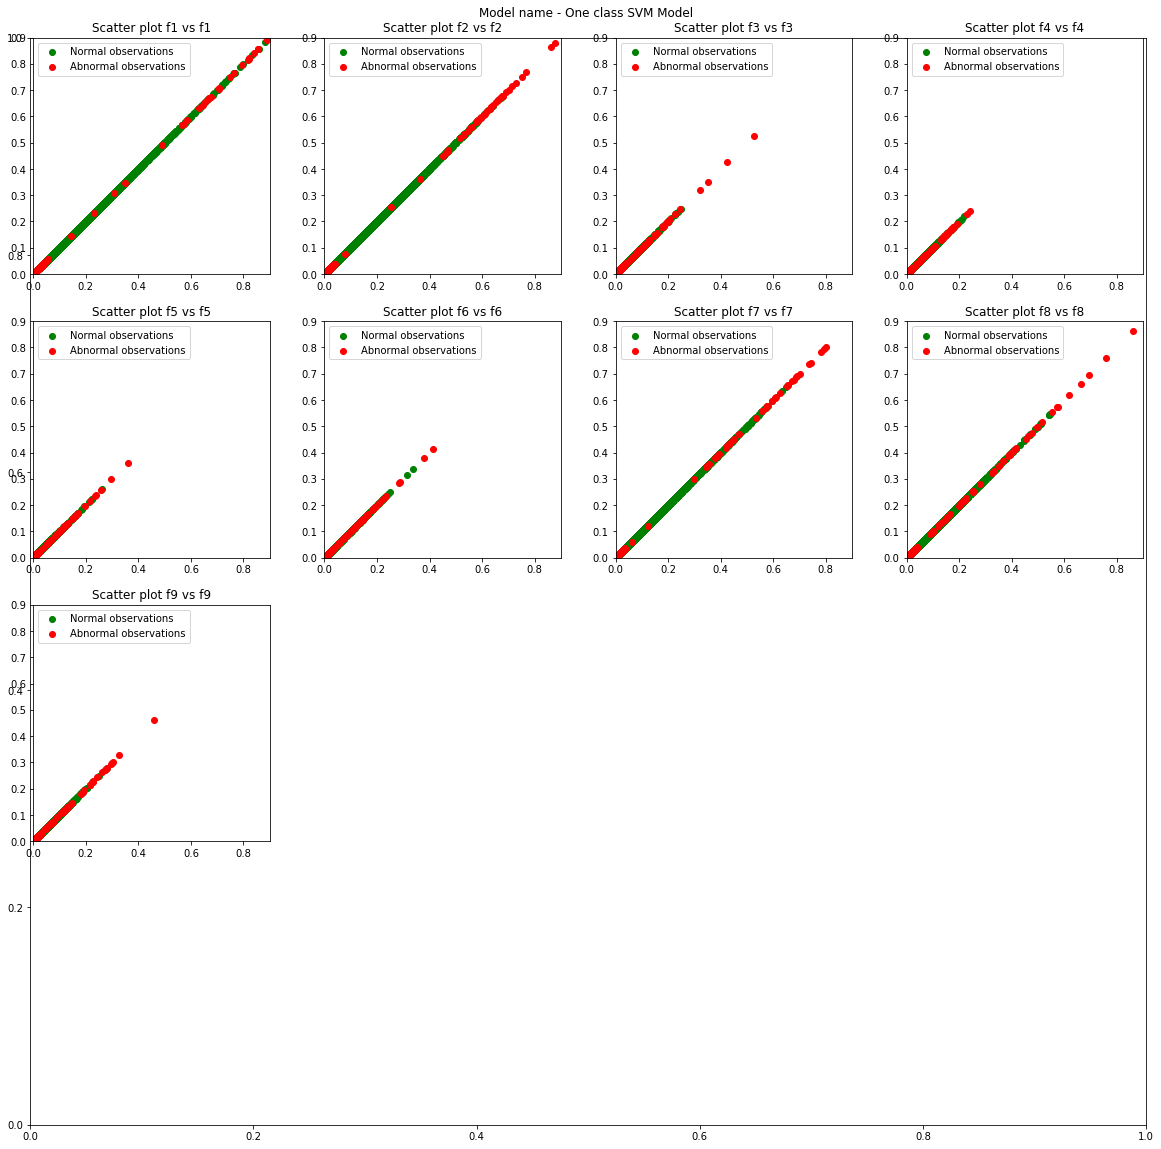

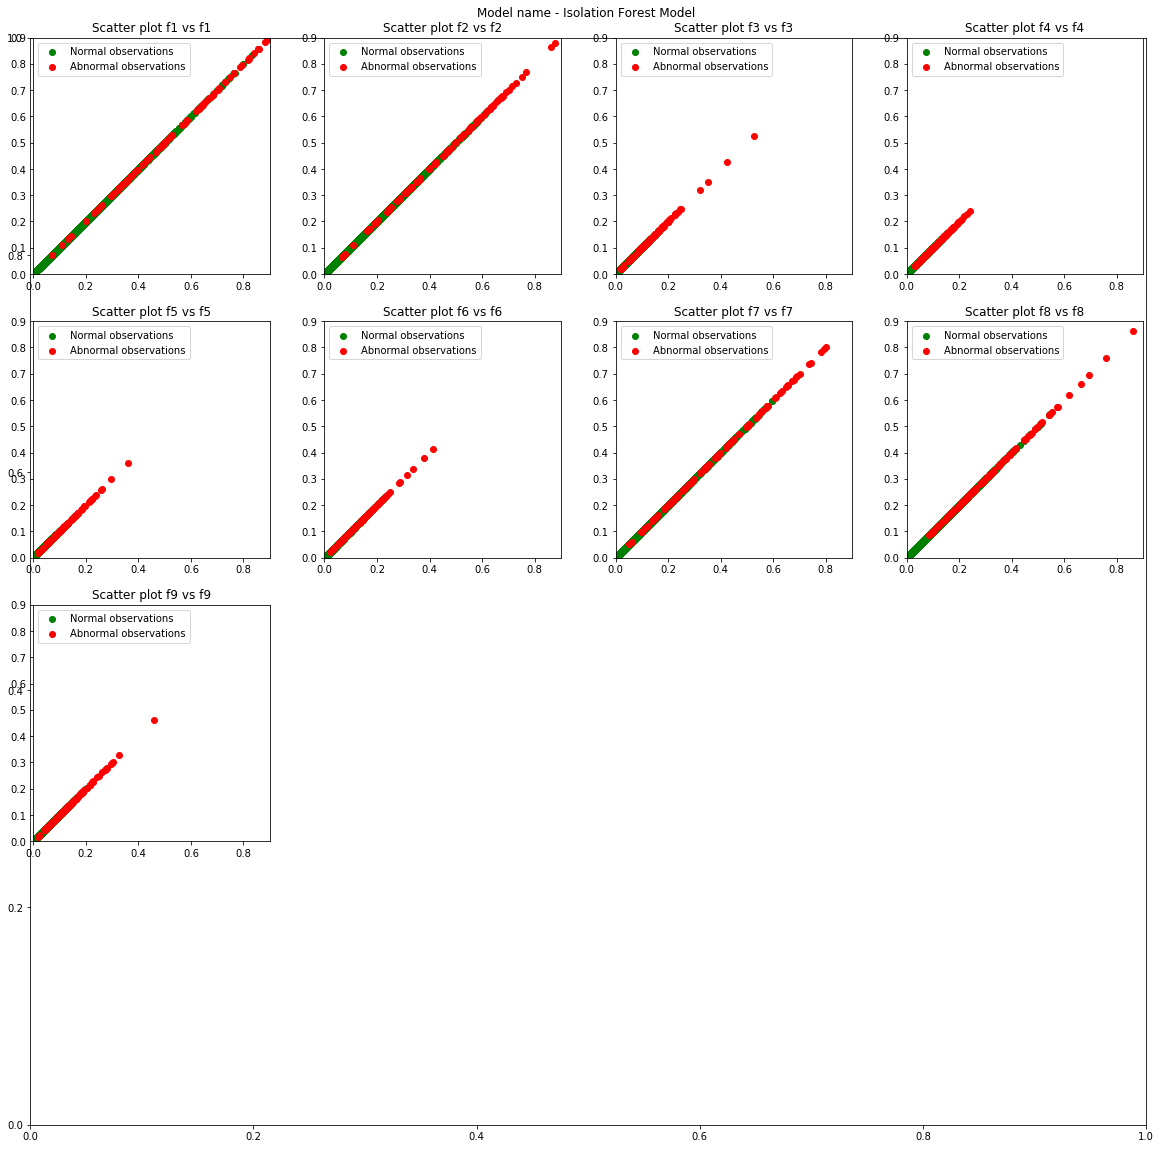

In [14]:
plotselfall(y_pred_test_OSVM_all,'One class SVM Model') # One class SVM Model
plotselfall(y_pred_test_IF_all,'Isolation Forest Model') # Isolation Forest Model

#print type(y_pred_test_OSVM_all)
#print len(y_pred_test_OSVM_all)
#plotselfall(fcol9)

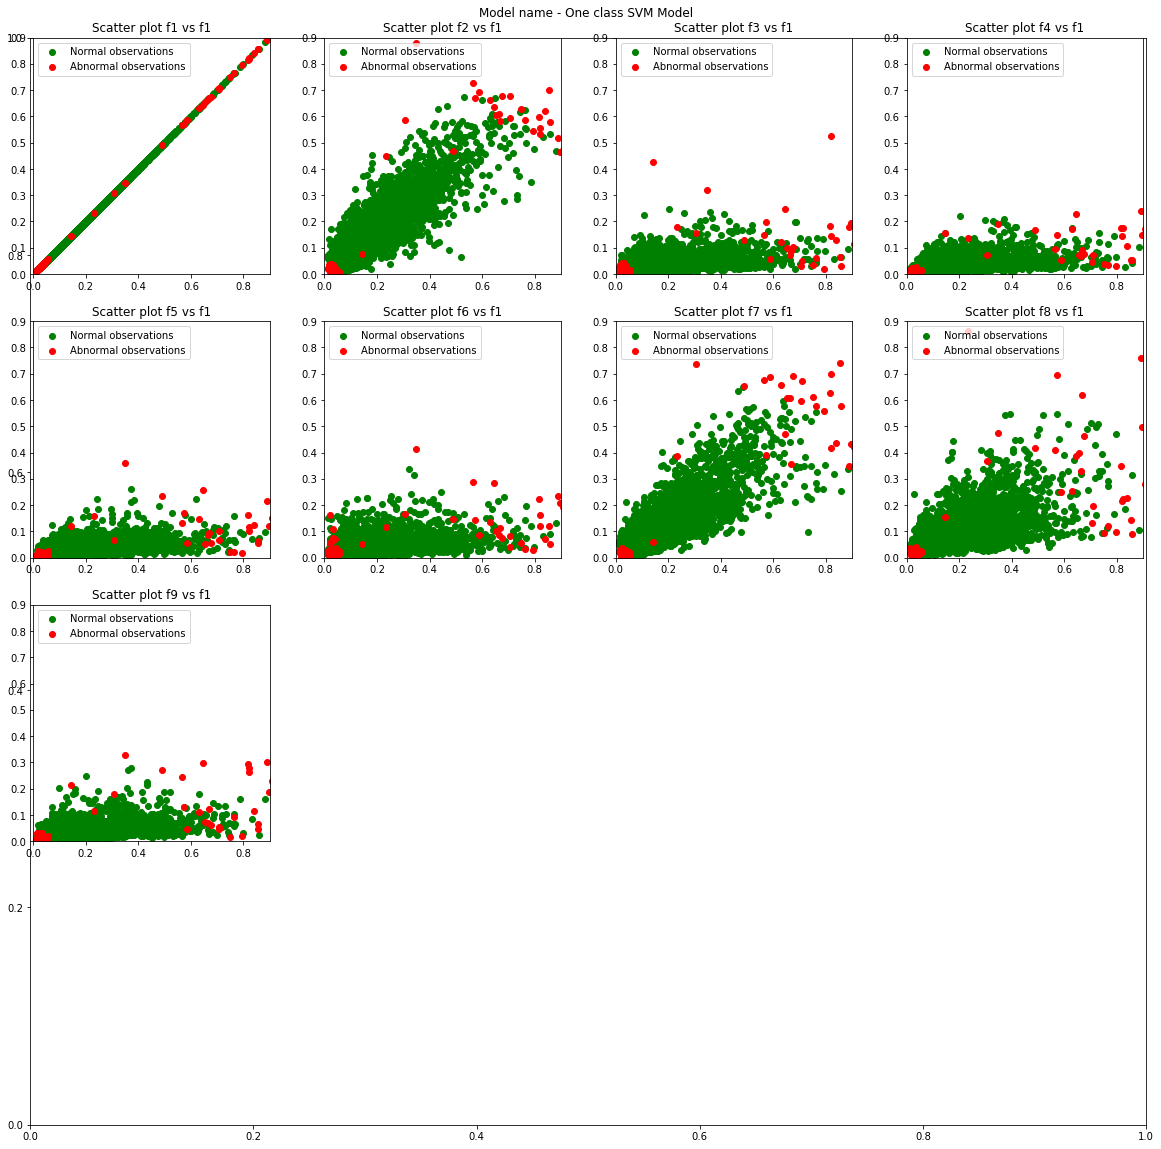

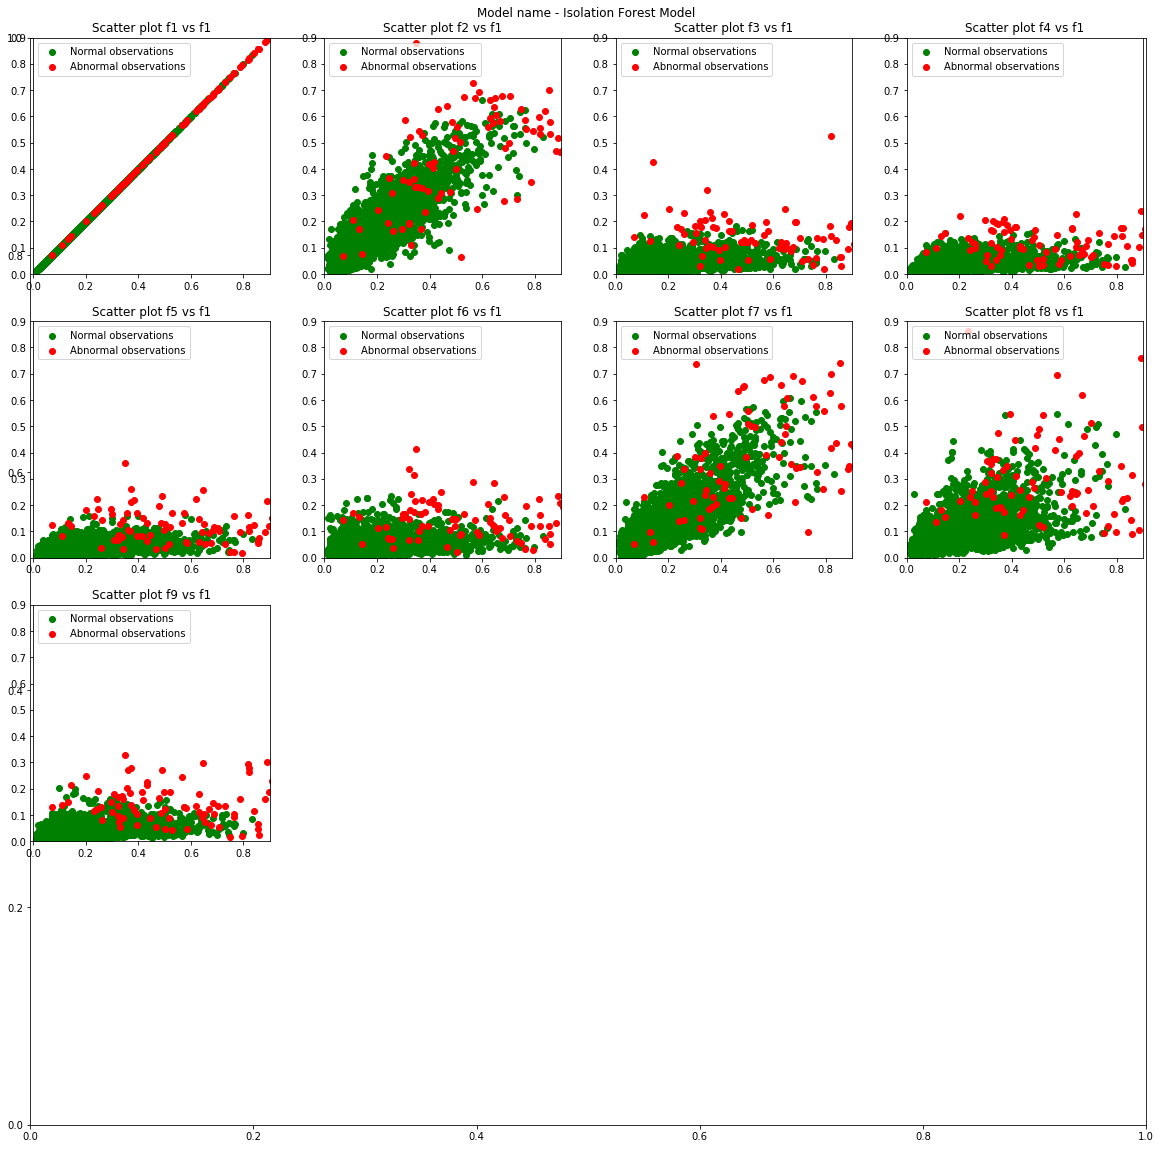

In [46]:
plotonevsall(y_pred_test_OSVM_all,'f1','One class SVM Model')
plotonevsall(y_pred_test_IF_all,'f1', 'Isolation Forest Model')

In [8]:
#Model using Box plot whiskers

_, bp = pd.DataFrame.boxplot(train, return_type='both')

outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]



#print(len(whiskers)/2)

oddataarrval = test.values
foutlier = np.zeros(oddataarrval.shape)

def runoutlier(col):
    for i in range(len(whiskers)):
        for j in range(len(oddataarrval[:,0])):
            if ( oddataarrval[j,col] <= whiskers[i][1] or oddataarrval[j,col] >= whiskers[i+1][1] ) :
                foutlier[j,col] = -1
            else :
                foutlier[j,col] = 1

        i=i+2
        if i==18:
            break
runoutlier(0)
runoutlier(1)
runoutlier(2)
runoutlier(3)
runoutlier(4)
runoutlier(5)
runoutlier(6)
runoutlier(7)
runoutlier(8)
print(oddataarrval.shape)
print(whiskers[16][1])
print(foutlier[:,1])
print test.values.shape

(4264L, 9L)
0.000868
[-1.  1.  1. ...,  1.  1. -1.]
(4264L, 9L)


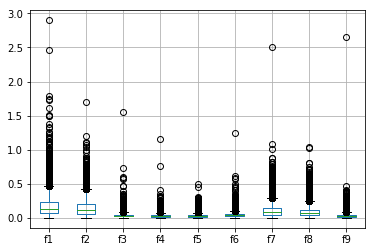

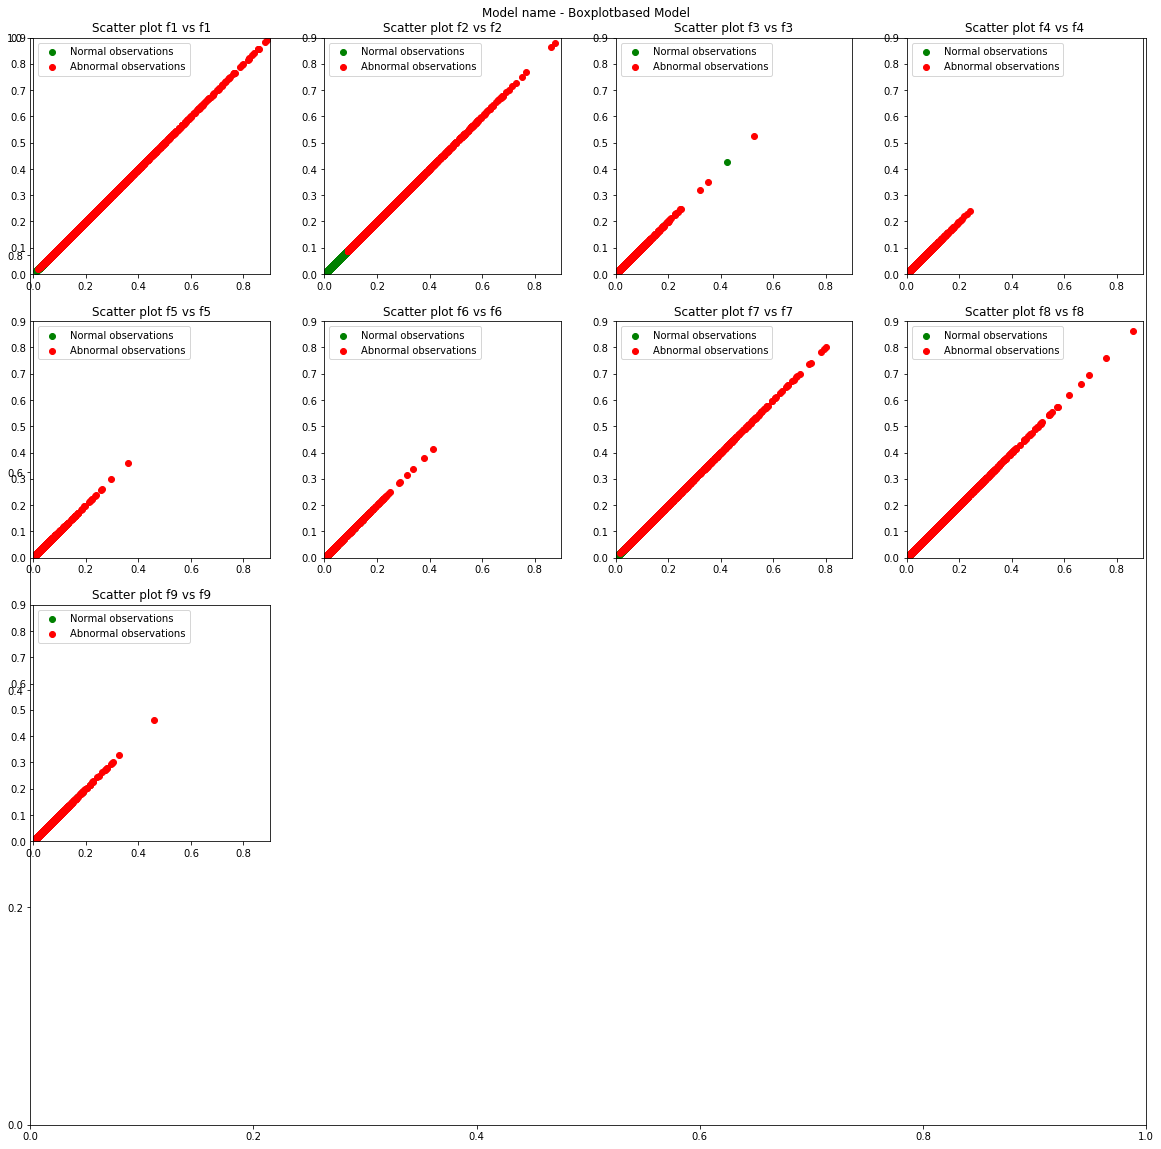

4264
1714
2550


'\nprint(type(y_pred_test_OSVM_all))\nprint(y_pred_test_OSVM_all.shape)\nprint(type(foutlier[:,0]))\nprint(foutlier[:,0].shape)\n'

In [10]:
#outlier prediction on test data by using outlier whisker information of Box plot 
plotselfall(foutlier[:,1],'Boxplotbased Model')

print(len(foutlier[:,1]))
print(len(foutlier[:,1][foutlier[:,1]==1]))
print(len(foutlier[:,1][foutlier[:,1]==-1]))

#print type(foutlier[:,1])

"""
print(type(y_pred_test_OSVM_all))
print(y_pred_test_OSVM_all.shape)
print(type(foutlier[:,0]))
print(foutlier[:,0].shape)
"""

In [15]:
#code for considering combination of individual variable model and one class SVM 
fcolarray = np.vstack((fcol1, fcol2, fcol3, fcol4, fcol5, fcol6, fcol7, fcol8, fcol9,y_pred_test_OSVM_all))

col = np.zeros( (1,int(fcolarray[1,:].shape[0]))) 
fcolfinal = np.vstack((fcolarray,col))
print(fcolfinal[10,:])


for i in range(len(fcolfinal[0,:])):
    if (fcolfinal[0,i]==-1 or fcolfinal[1,i]==-1 or fcolfinal[2,i]==-1 or fcolfinal[3,i]==-1 or fcolfinal[4,i]==-1 or fcolfinal[5,i]==-1 or fcolfinal[6,i]==-1 or fcolfinal[7,i]==-1 or fcolfinal[8,i]==-1) and (fcolfinal[9,i]==-1) :
        fcolfinal[10,i] = -1
    else :
        fcolfinal[10,i] = 1
        
    #print fcolfinal[10,i]
print(fcolfinal[10,:])

print(np.count_nonzero( np.where(fcolfinal[10,:]==-1) ) )

#join all coloumns fcol1-9
#fnewcol = np.zeros( (np.count_nonzero(fcol1))) 
#fnewcol = np.where( np.logical_and( np.logical_or(fcol1==-1,fcol2==-1,fcol3==-1,fcol4==-1,fcol5==-1,fcol6==-1,fcol7==-1,fcol8==-1,fcol9==-1), y_pred_test_OSVM_all=='-1'),'-1','1')
#fnewcol = np.where( np.any(fcol1<0,fcol2<0),'-1','1')
#fnewcol.shape
#plotselfall(fcol2)

[ 0.  0.  0. ...,  0.  0.  0.]
[ 1.  1.  1. ..., -1.  1.  1.]
85


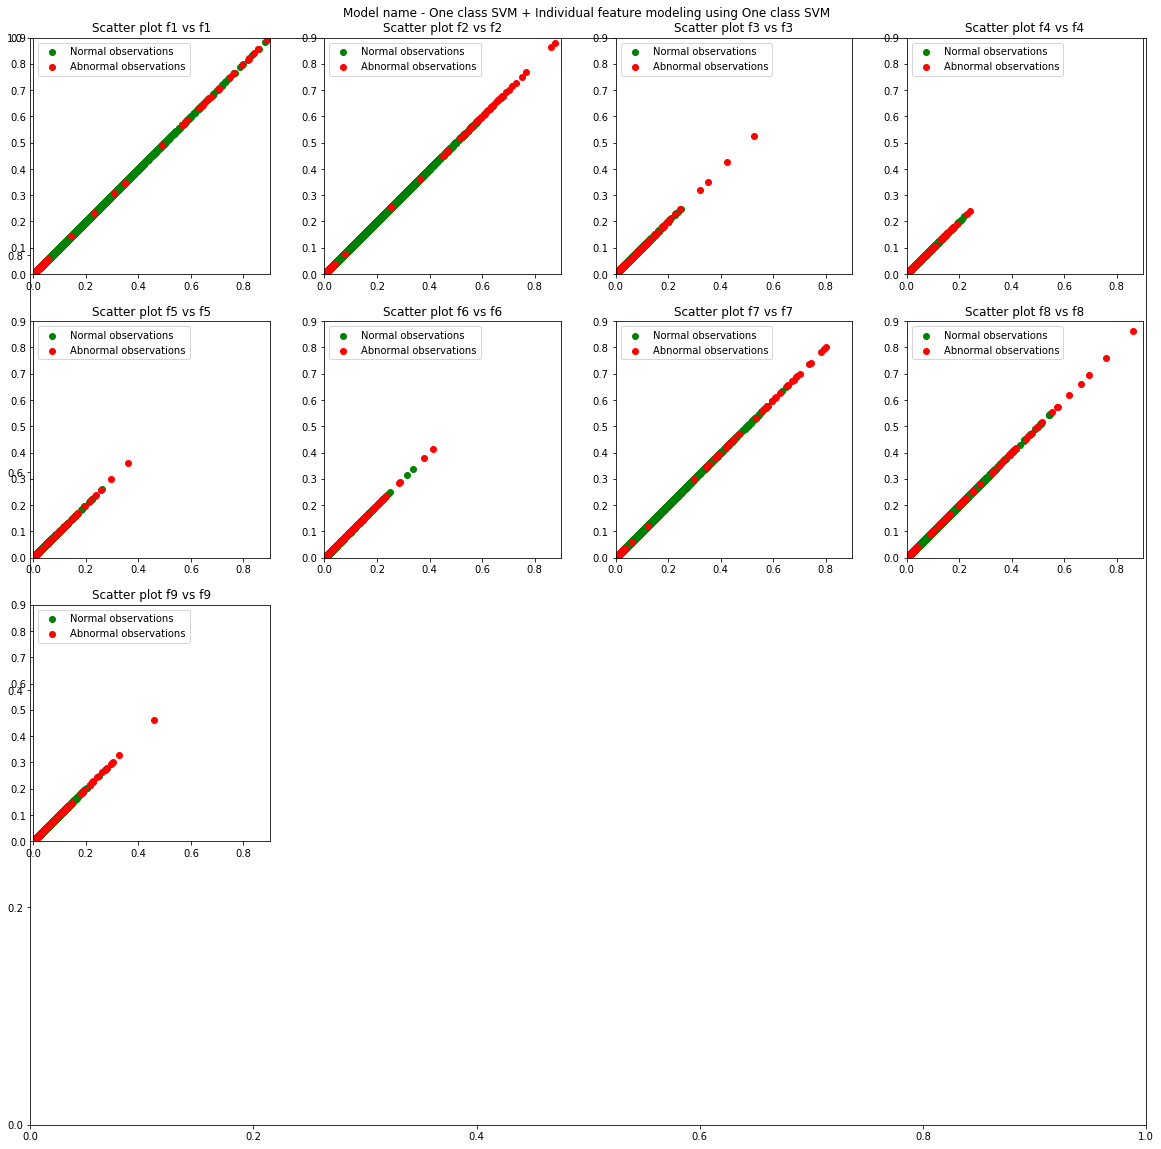

In [16]:
plotselfall(fcolfinal[10,:],'One class SVM + Individual feature modeling using One class SVM') # One class SVM Model + Individual Model
#print type(fcolfinal[10,:])
#print len(fcolfinal[10,:])

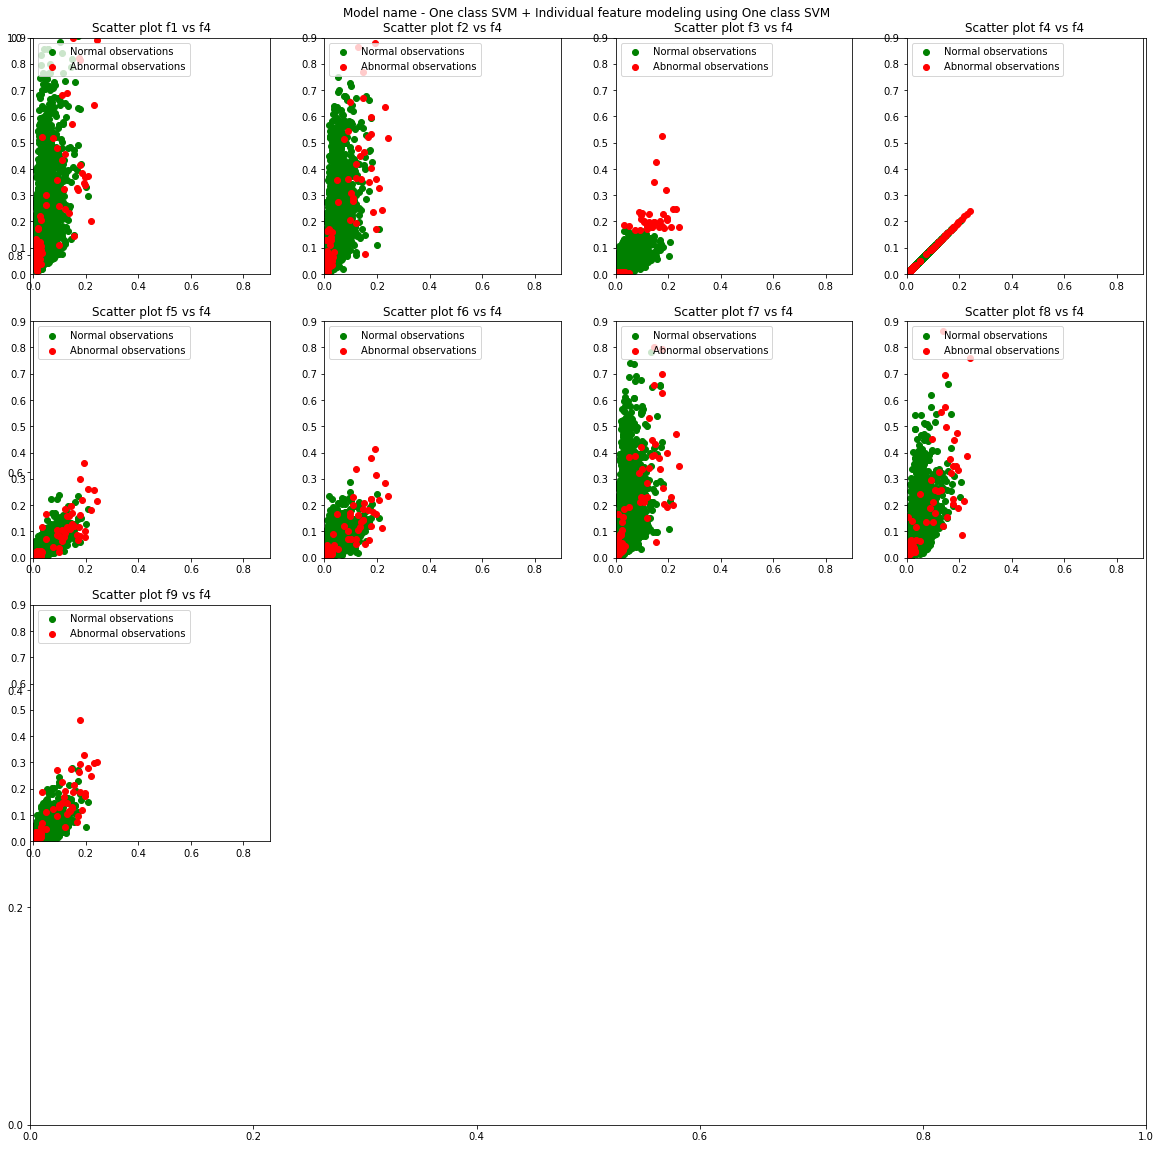

In [49]:
plotonevsall(fcolfinal[2,:],'f4','One class SVM + Individual feature modeling using One class SVM')


In [18]:
#fit the model One class svm for log variables
clf = OneClassSVM(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, nu=0.02, random_state=rng)
clf.fit(trainexp)
#y_pred_train = clf.predict(train)
y_pred_test_log_OSVM_all = clf.predict(testexp)

print(len(y_pred_test_log_OSVM_all))
print(len(y_pred_test_log_OSVM_all[y_pred_test_log_OSVM_all==1]))
print(len(y_pred_test_log_OSVM_all[y_pred_test_log_OSVM_all==-1]))

4264
4172
92


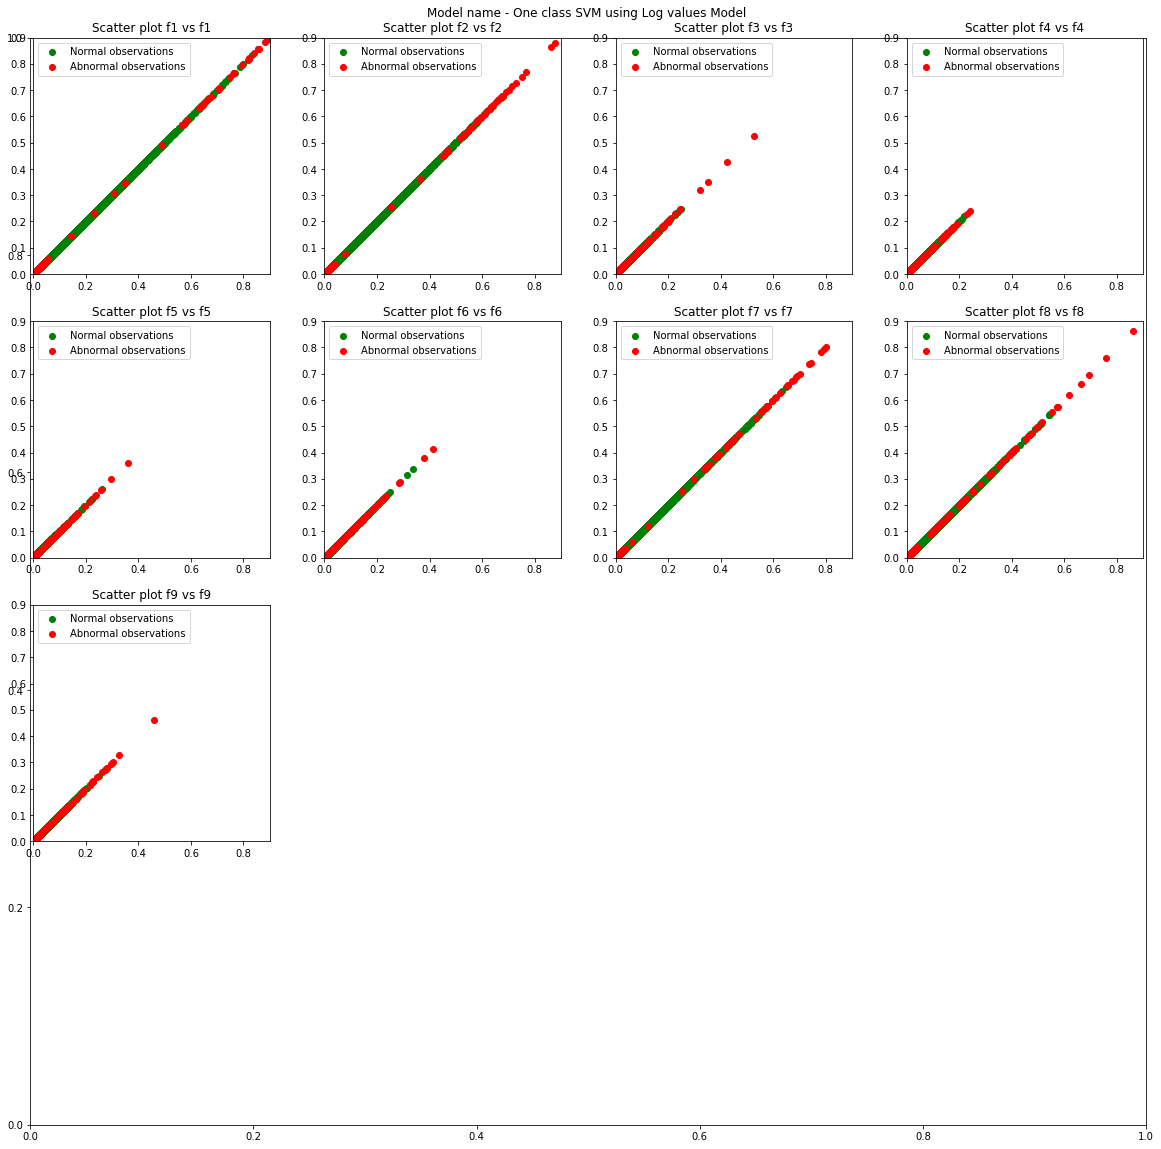

In [19]:
plotselfall(y_pred_test_log_OSVM_all,'One class SVM using Log values Model') # log + svm scatter plot model

In [20]:

# importing H2o for autoencoder
import h2o

In [21]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from C:\Users\PD186042\AppData\Local\Continuum\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\pd186042\appdata\local\temp\tmppesvqi
  JVM stdout: c:\users\pd186042\appdata\local\temp\tmppesvqi\h2o_pd186042_started_from_python.out
  JVM stderr: c:\users\pd186042\appdata\local\temp\tmppesvqi\h2o_pd186042_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,07 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_pd186042_jp678i
H2O cluster total nodes:,1
H2O cluster free memory:,3.531 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [22]:
# Import ECG train and test data into the H2O cluster 
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator 

#train_ecg = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/anomaly/ecg_discord_train.csv")
#test_ecg = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/anomaly/ecg_discord_test.csv")


In [23]:
# converting train pandas data frame to H2oframe
numpyMatrix = train.as_matrix()
trainecg = h2o.H2OFrame(numpyMatrix)

# converting train pandas data frame to H2oframe
numpyMatrix = test.as_matrix()
testecg = h2o.H2OFrame(numpyMatrix)

print trainecg.shape
print testecg.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
(16930, 9)
(4264, 9)


In [56]:
# Train deep autoencoder learning model on "normal" 
# training data, y ignored
anomaly_model = H2OAutoEncoderEstimator( 
        activation="Tanh", 
        hidden=[3], 
        sparse=True,
        l1=1e-4, 
        epochs=3000)
anomaly_model.train(
    x=trainecg.names,  
        training_frame=trainecg)                


deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [57]:
# Compute reconstruction error with the Anomaly 
# detection app (MSE between output and input layers)
recon_error = anomaly_model.anomaly(trainecg)

errort1 = h2o.H2OFrame.as_data_frame(recon_error)

#print(test.head(10))

errort2 = errort1.sort(['Reconstruction.MSE'], ascending=[False])
#print(test2.head(10))

# take top 2% MSE from training set
errort3 = errort2.head(int(len(errort2)*0.02))

# take the cutoff value for having top2%
cutoff = float(errort3.tail(1)['Reconstruction.MSE'])

print cutoff
print errort3

C:\Users\PD186042\AppData\Local\Continuum\Anaconda3\Lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


0.00106530447184
       Reconstruction.MSE
16069            0.398734
14222            0.058367
8686             0.050046
14229            0.025099
11273            0.021894
8474             0.021749
8493             0.020629
11486            0.019343
5864             0.014903
14232            0.014706
8761             0.013703
272              0.013289
14218            0.012213
12955            0.011959
8609             0.010883
15476            0.010815
14231            0.010370
14459            0.010102
12089            0.009652
7586             0.008731
15868            0.008633
14217            0.008593
10526            0.008292
9272             0.007195
7049             0.007039
14225            0.006842
14476            0.006775
13382            0.006491
10586            0.006318
14557            0.005993
...                   ...
785              0.001130
3261             0.001129
4294             0.001129
9084             0.001127
2125             0.001123
11344            0.00

In [58]:
# Note: Testing = Reconstructing the test dataset
test_recon = anomaly_model.predict(testecg) 
test_recon.shape


deeplearning prediction progress: |███████████████████████████████████████| 100%


(4264, 9)

In [59]:
test_error = anomaly_model.anomaly(testecg)

# converting from H2o frame to pandas data frame
testenc_error = h2o.H2OFrame.as_data_frame(test_error)

#create new column to indicate anomaly or not based on cutoff point calculated on training set
testenc_error['autoencoder'] = np.sign(cutoff - testenc_error['Reconstruction.MSE'] )

In [60]:
autoencodermodel = np.array(testenc_error['autoencoder'])
autoencodermodel
#count of all the anamolies in test prediction data
print(np.count_nonzero( np.where(autoencodermodel==-1) ) )
print len(autoencodermodel)

84
4264


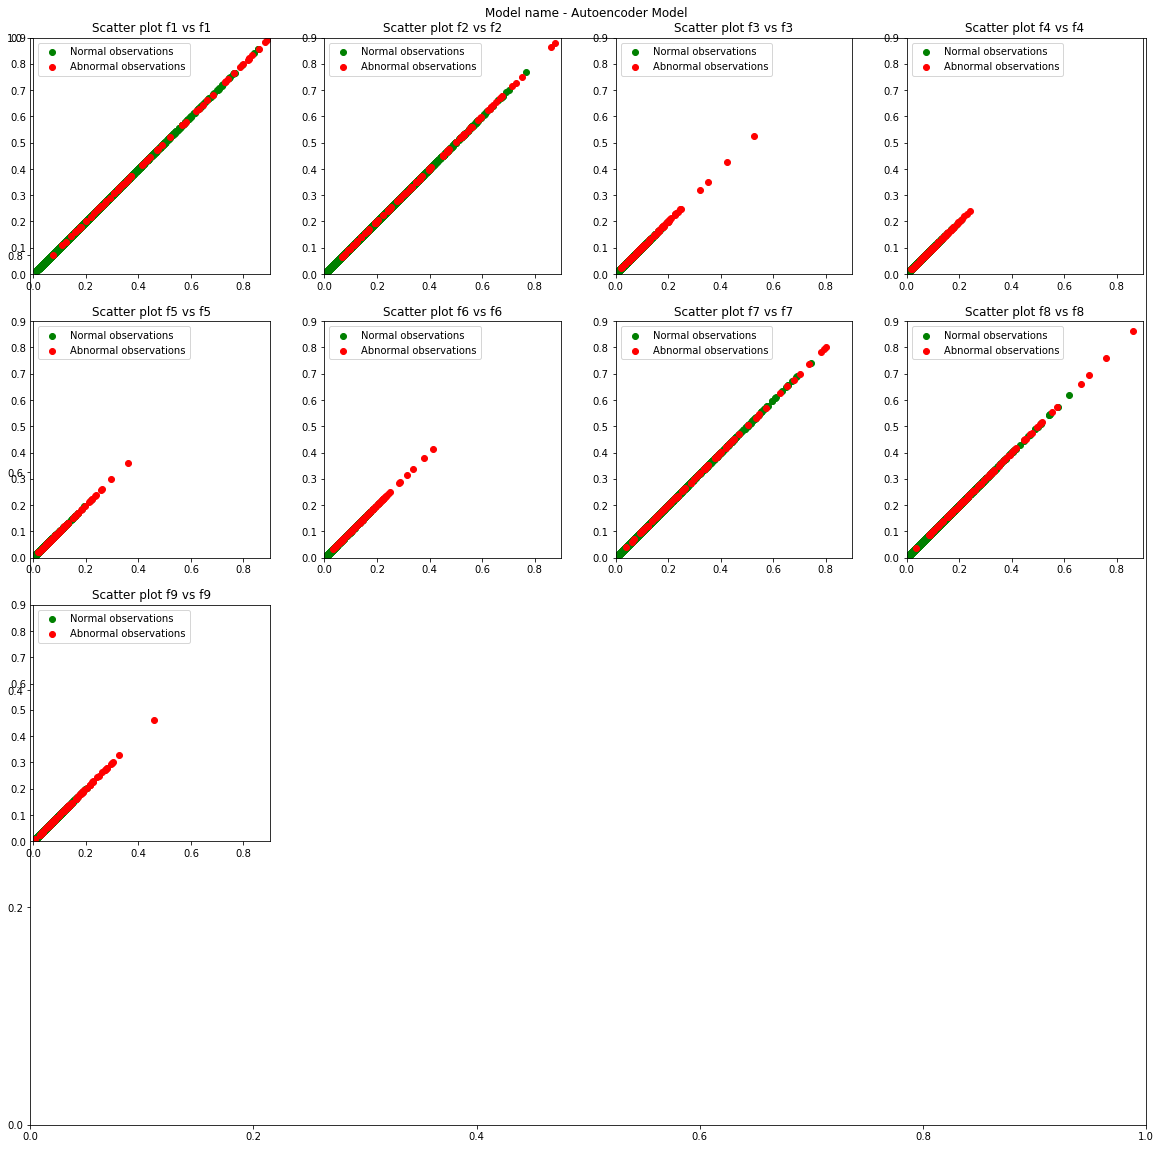

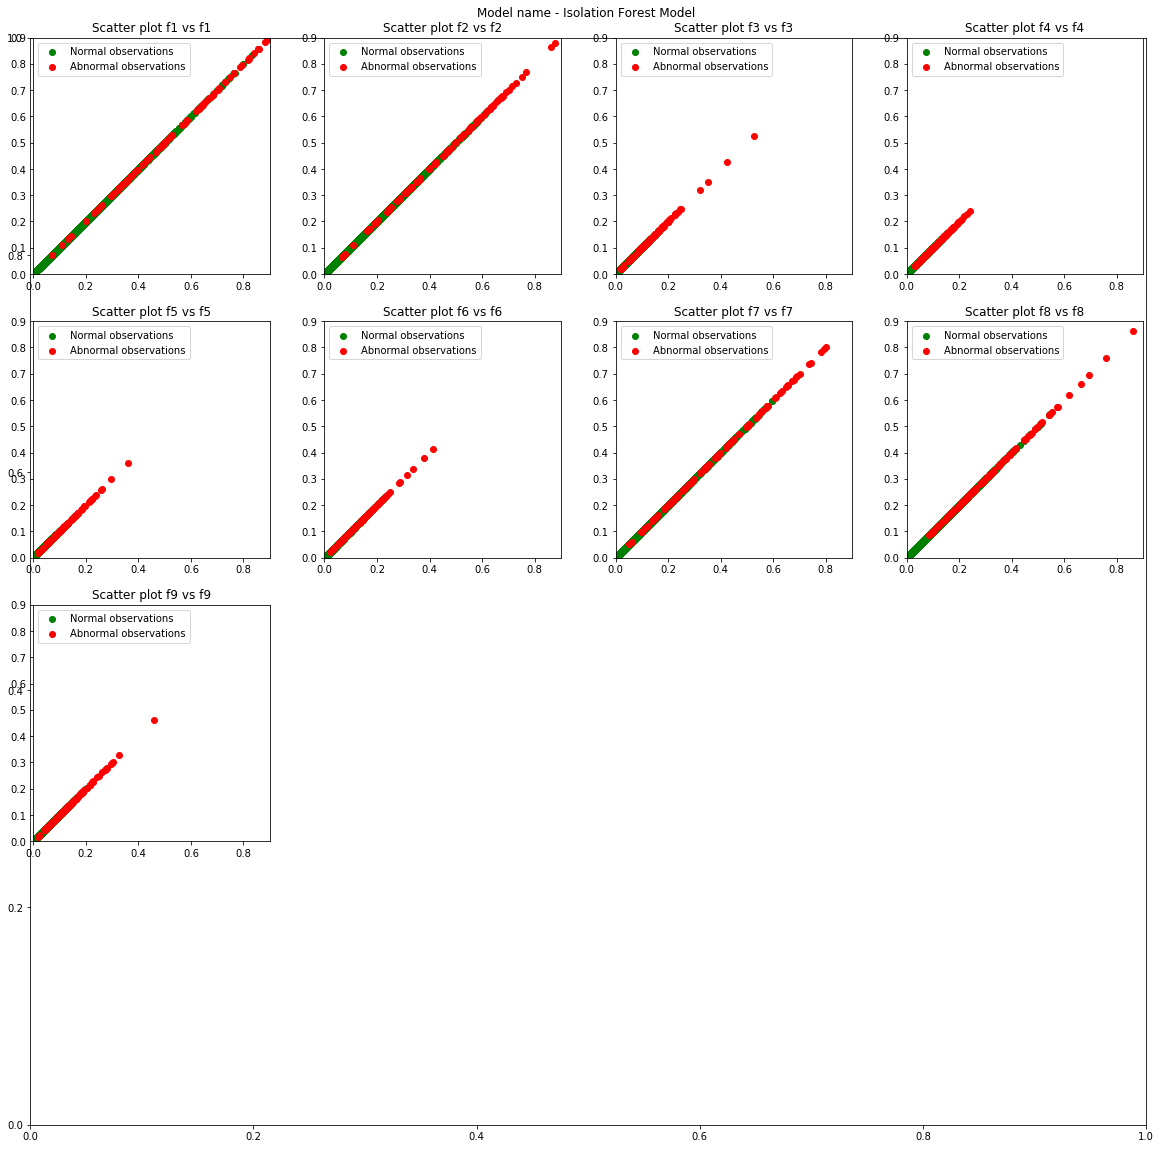

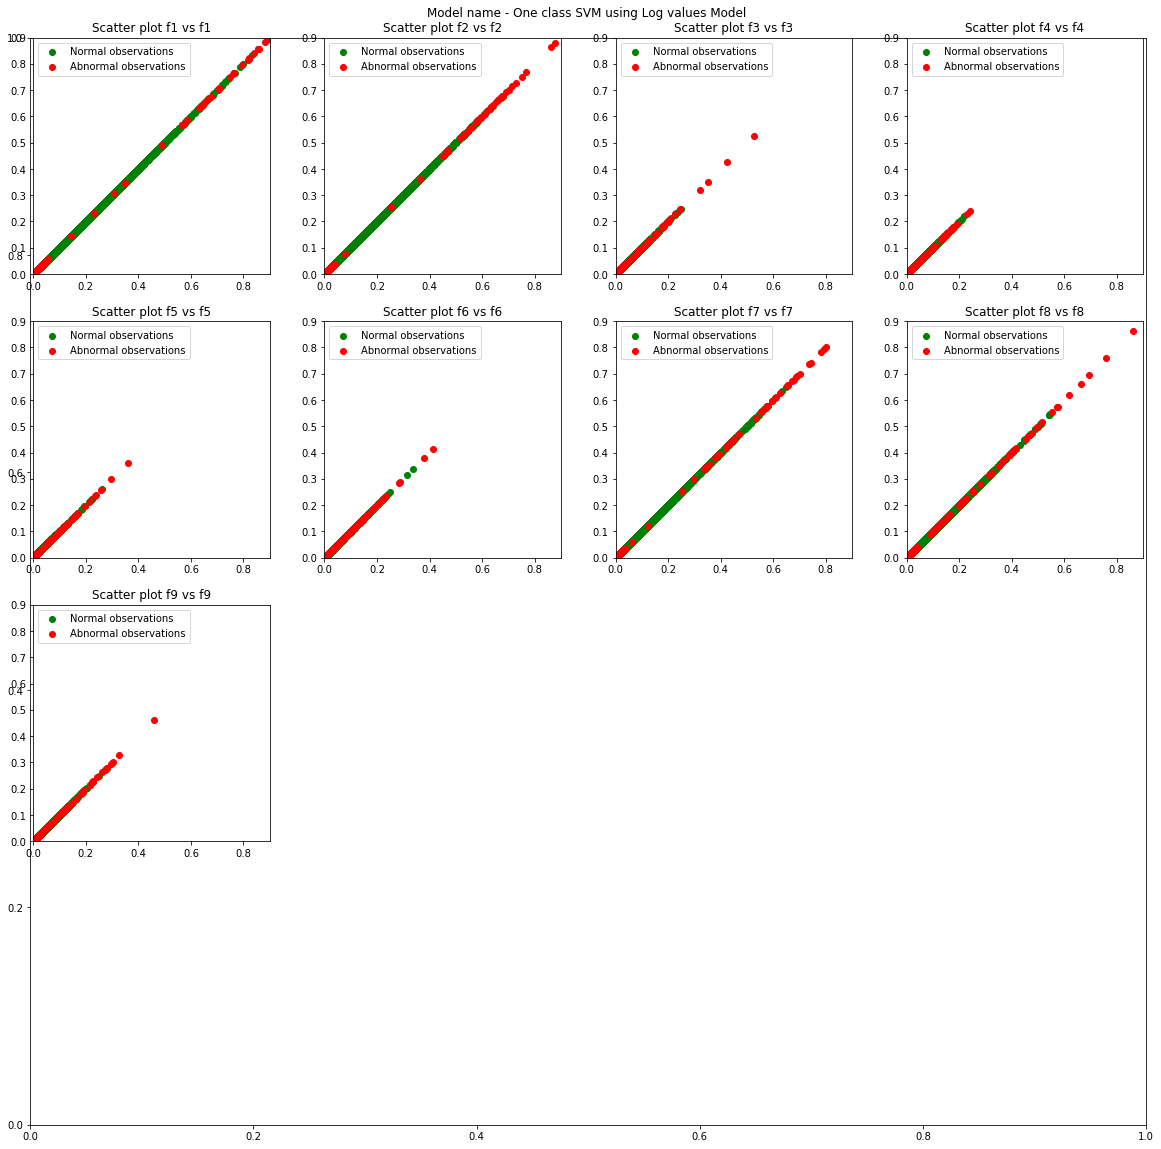

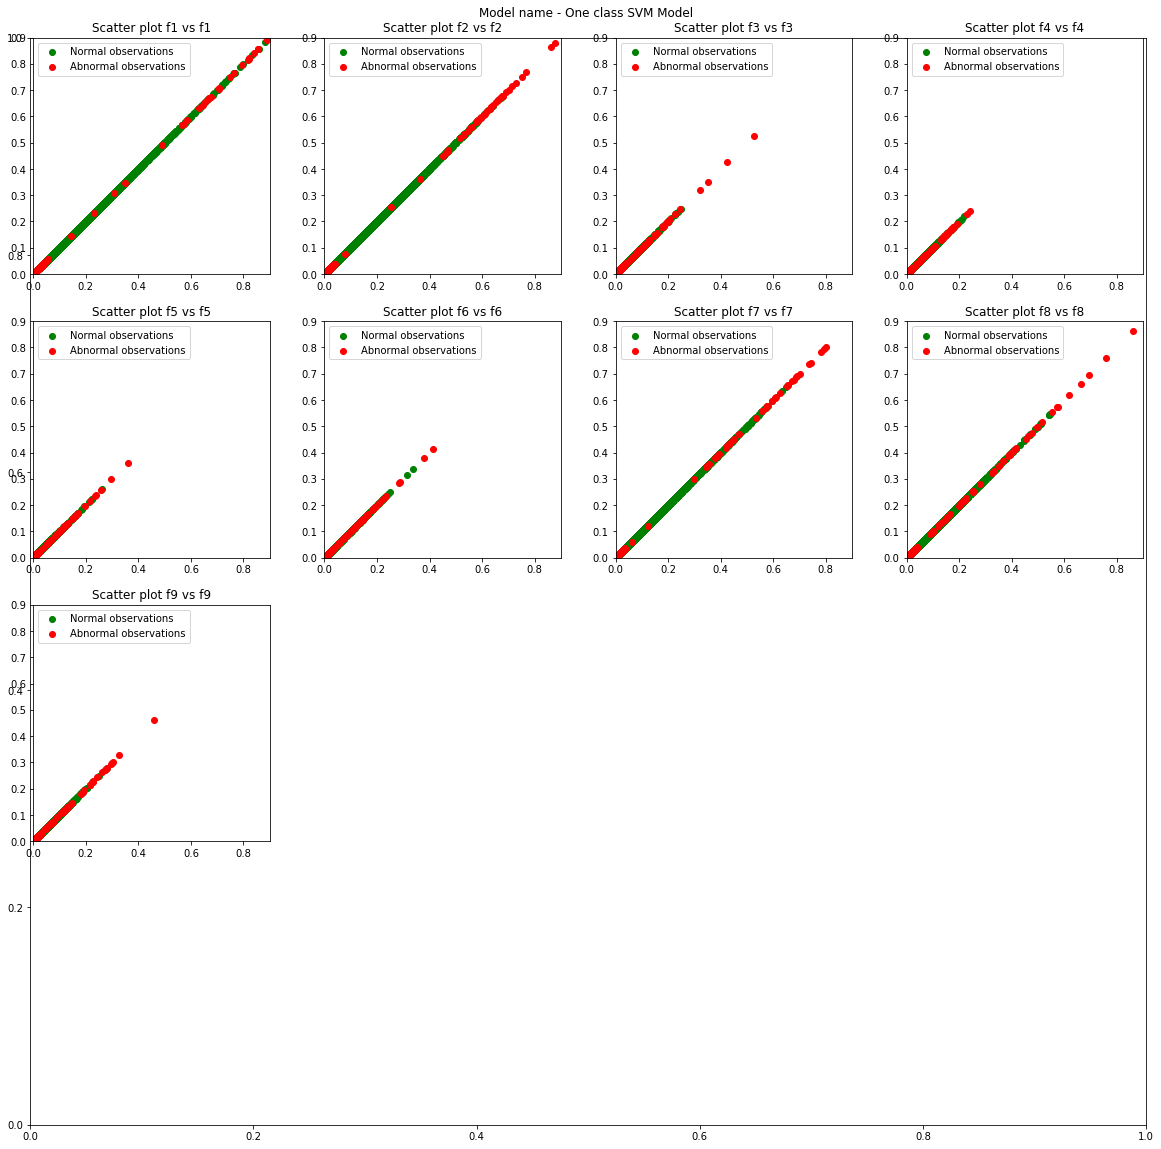

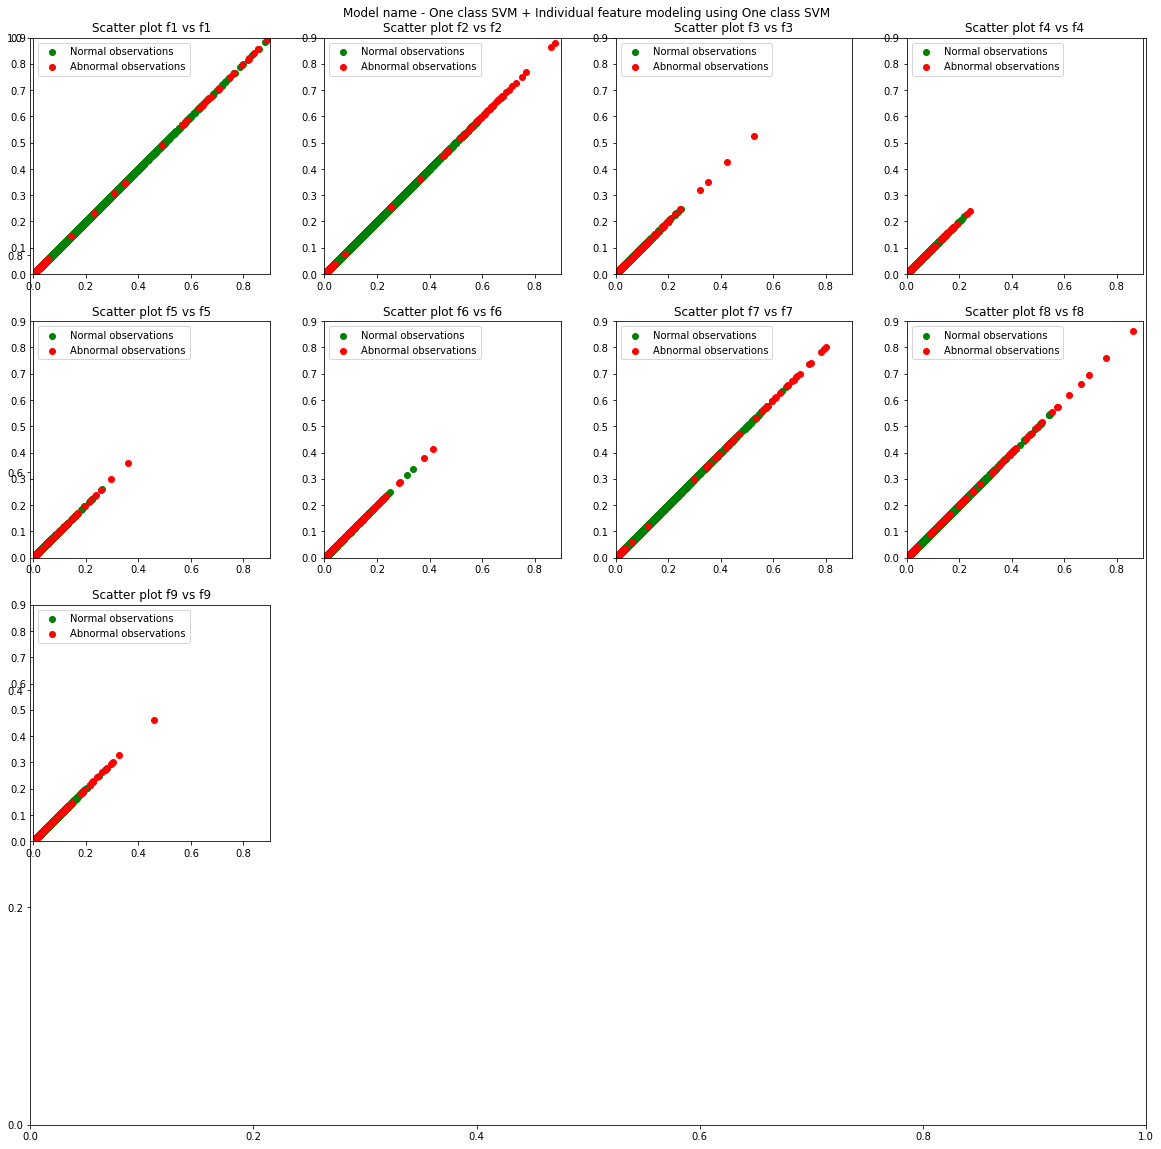

In [61]:
plotselfall(autoencodermodel,'Autoencoder Model') # autoencoder model
plotselfall(y_pred_test_IF_all,'Isolation Forest Model') # Isolation Forest Model
plotselfall(y_pred_test_log_OSVM_all,'One class SVM using Log values Model') # log + one class svm scatter plot model
plotselfall(y_pred_test_OSVM_all,'One class SVM Model') # One class SVM Model
plotselfall(fcolfinal[10,:],'One class SVM + Individual feature modeling using One class SVM') # One class SVM Model + Individual Model

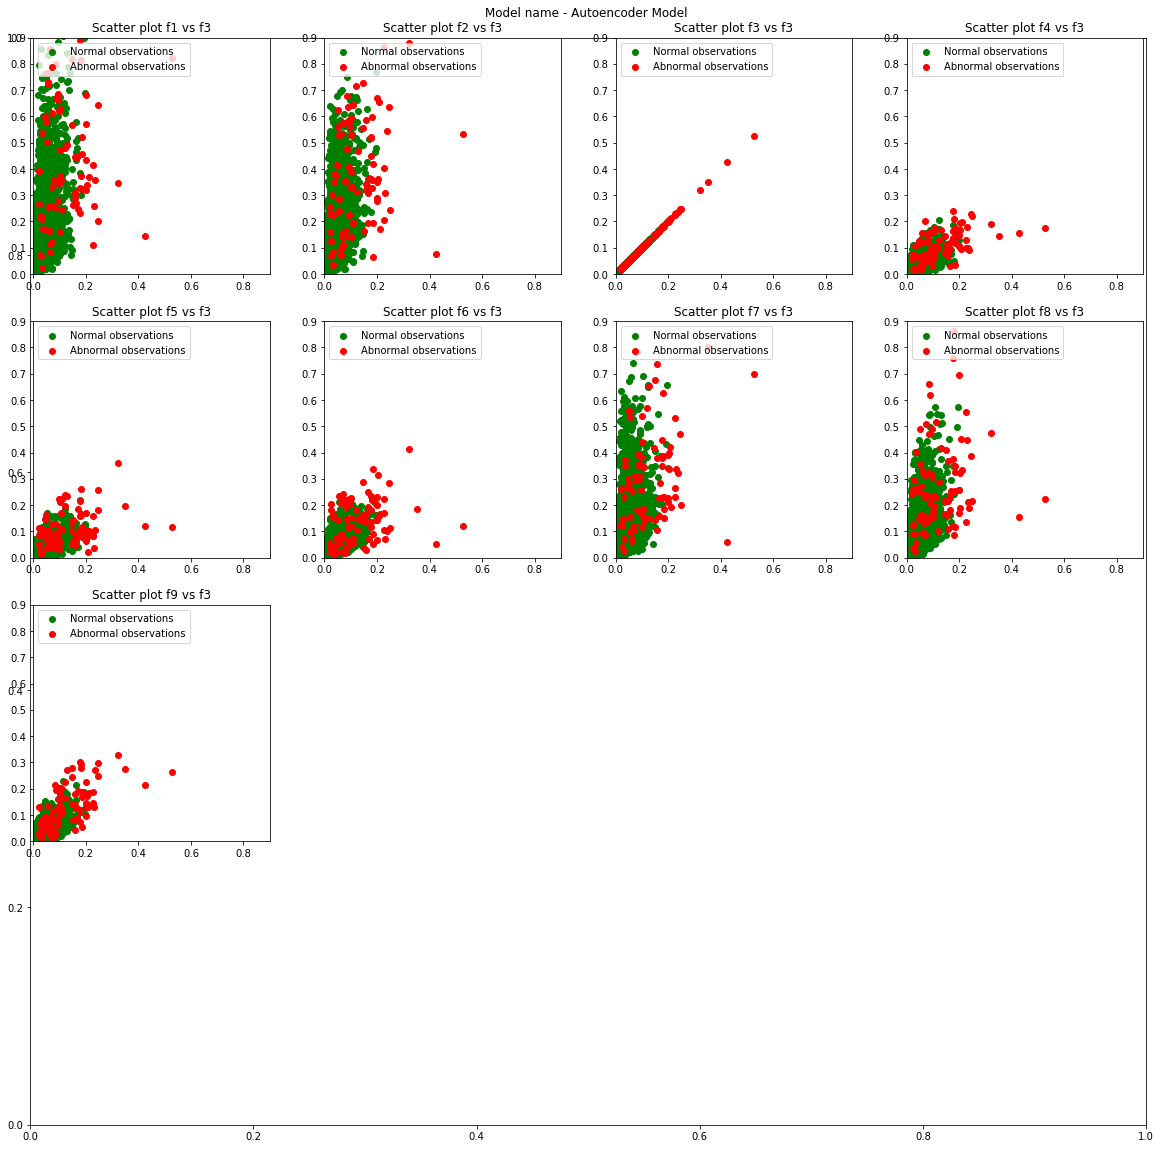

In [45]:
plotonevsall(autoencodermodel,'f3','Autoencoder Model')